**załadowanie potrzebnych bibliotek**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dane zostały pobrane z platformy **kaggle**: [link](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

---

są to dane medyczne, które pochodzą z 1988 roku z ameryki północnej oraz europy.

obejmują następujące informacje o pacjentach:
*   dane demograficzne, takie jak **wiek** (*age*) i **płeć** (*sex*) (jako zmienna binarna: 0 = kobieta, 1 = mężczyzna)
*   główny objaw: **typ bólu w klatce piersiowej** (*cp*) (jako zmienna kategoryczna: 3 typy bólu lub jego brak - 0)
*   parametry fizjologiczne: **ciśnienie tętnicze w spoczynku** (*trestbps*) (mmhg), **poziom cholesterolu** (*chol*) (mg/dl)
*   wyniki badań:
  * **poziom cukru na czczo** (*fbs*) (jako zmienna binarna - czy poziom jest wyższy niż 120 mg/dl: 1 = tak, 0 = nie)
  *   **wynik badania elektrokardiograficznego spoczynkowego** (*restecg*) (jako zmienna kategoryczna: 0/1/2)
  *   **maksymalne osiągnięte tętno** (*thalach*)
  *   **dławica wysiłkowa** (*exang*) (jako zmienna binarna: 1 = tak, 0 = nie)
  *   **obniżenie odcinka st w badaniu ekg podczas testu wysiłkowego** (*oldpeak*)
  *   **nachylenie odcinka st podczas testu wysiłkowego** (*slope*) (jako zmienna kategoryczna: 0 = obniżenie, 1 = płaski, 2 = podwyższenie)
  *   **liczba głównych naczyń wieńcowych widocznych we fluoroskopii** (*ca*) (jako zmienna kategoryczna: 0/1/2/3)
  *   **wynik badania talowego** (*thal*) (jako zmienna kategoryczna: 0 = normalny, 1 = trwały defekt, 2 = odwracalny defekt)
*   **obecność choroby serca** (*target*) (jako zmienna docelowa oraz binarna: 1 = obecna, 0 = brak)

---

celem projektu jest **wytrenowanie modelu uczenia maszynowego**, który na podstawie powyższych informacji o pacjentach sklasyfikuje i **przewidzi, czy u danego pacjenta występuje choroba serca**.

---

dzięki modelowi, hipotetycznie, lekarze mogą szybciej ocenić ryzyko wystąpienia choroby serca i podejmować decyzje diagnostyczne z uwzględnieniem danych historycznych innych pacjentów.

**import danych**

In [2]:
uploaded = files.upload()
data = next(iter(uploaded))
data = pd.read_csv(data)
print(data)

Saving heart.csv to heart (3).csv
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

**forma tabelaryczna** danych i ich **wstępne przejrzenie**

In [3]:
print(tabulate(data.head(1000), headers='keys', tablefmt='fancy_grid'))

╒═════╤═══════╤═══════╤══════╤════════════╤════════╤═══════╤═══════════╤═══════════╤═════════╤═══════════╤═════════╤══════╤════════╤══════════╕
│     │   age │   sex │   cp │   trestbps │   chol │   fbs │   restecg │   thalach │   exang │   oldpeak │   slope │   ca │   thal │   target │
╞═════╪═══════╪═══════╪══════╪════════════╪════════╪═══════╪═══════════╪═══════════╪═════════╪═══════════╪═════════╪══════╪════════╪══════════╡
│   0 │    52 │     1 │    0 │        125 │    212 │     0 │         1 │       168 │       0 │       1   │       2 │    2 │      3 │        0 │
├─────┼───────┼───────┼──────┼────────────┼────────┼───────┼───────────┼───────────┼─────────┼───────────┼─────────┼──────┼────────┼──────────┤
│   1 │    53 │     1 │    0 │        140 │    203 │     1 │         0 │       155 │       1 │       3.1 │       0 │    0 │      3 │        0 │
├─────┼───────┼───────┼──────┼────────────┼────────┼───────┼───────────┼───────────┼─────────┼───────────┼─────────┼──────┼────────┼────

pierwszym etapem jest **eda**, czyli **eksploracyjna analiza danych**: przejrzenie ogólnej struktury danych, ich typów, ewentualnych brakujących wartości, rozkładów, wartości odstających

In [4]:
data.shape

(1025, 14)

dane zawierają **1025 rekordów** i **14 kolumn**, z czego 13 to zmienne, zawierające informacje o pacjentach, a ostatnia to zmienna docelowa, wskazująca na obecność choroby serca lub jej brak

In [5]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


wszystkie dane są **numeryczne**

In [6]:
print(data.isnull().any().any())

False


w danych **nie występują żadne brakujące wartości** (jeśli takowe by występowały można byłoby je uzupełnić na podstawie pozostałych danych za pomocą średniej wartości lub mediany ---> czyli nie trzeba byłoby usuwać rekordów z brakującymi wartościami, bo i tak jest ich niewiele, więc hipotetycznie lepszą opcją byłoby uzupełnienie)

**statystyki opisowe**

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
data['target'].value_counts()
data['target'].value_counts(normalize=True)

,proportion
target,
1,0.513171
0,0.486829


pacjentów z chorobą serca, jak i bez jest **prawie po równo**, co oznacza, że dane są **wystarczająco zbalansowane** i nie ma dominacji jednej z opcji

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

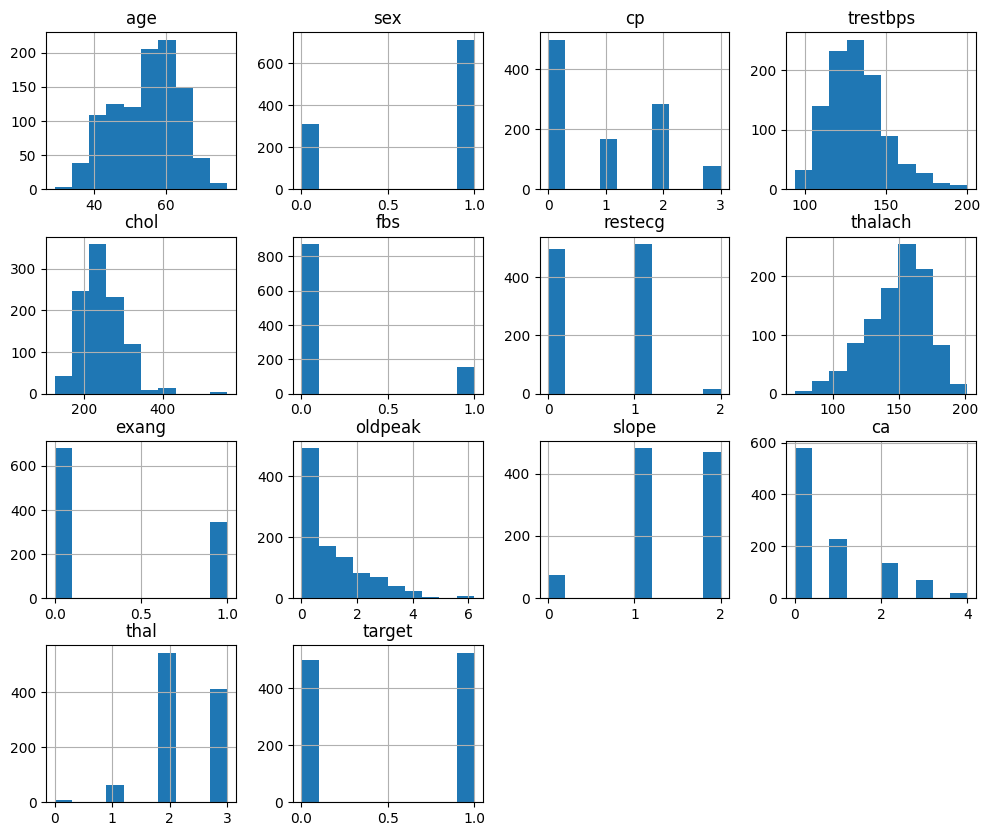

In [9]:
data.hist(figsize=(12, 10))

po przejrzeniu **histogramów** można zauważyć, że:
*   większość pacjentów znajduje się w grupie ryzyka chorobą serca
*   większość pacjentów
 to mężczyźni
*   nie występują nierealne wartości w wynikach badań ---> wszytkie są prawdopodobne
*   zarówno w *ca*, jak i *thal* występuje jedna dodatkowa wartość, której znaczenie nie zostało jasno zdefiniowane



In [10]:
print(data['ca'].value_counts())
print(data['thal'].value_counts())

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


wartość 4 w *ca* **zostanie usunięta**, ponieważ stanowi marginalną część wszystkich danych (mniej niż 2%).
z kolei wartość 3 w *thal* występuje u 410 pacjentów z 1025 i stanowi drugą największą wartość, więc nie może zostać usunięta ---> **pozostanie w danych**.

In [11]:
data = data[data['ca'] != 4]

In [12]:
print(data['ca'].value_counts())

ca
0    578
1    226
2    134
3     69
Name: count, dtype: int64


In [13]:
print(data.isnull().any().any())

False


wartość 4 w *ca* została usunięta.

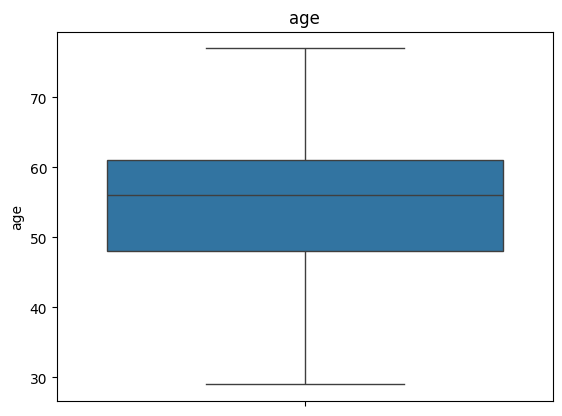

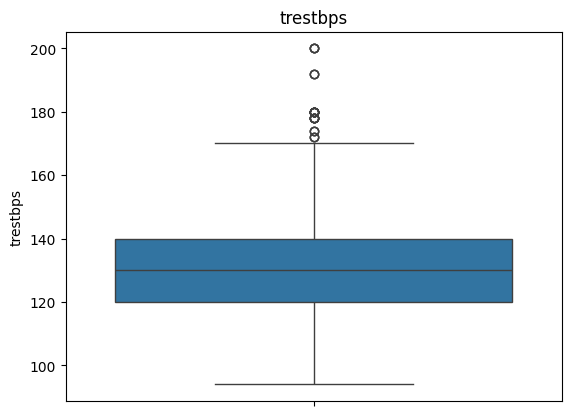

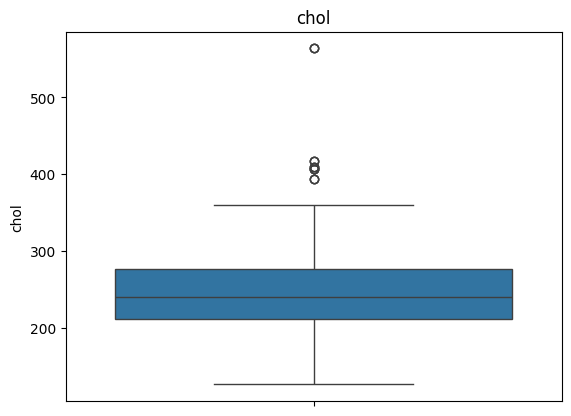

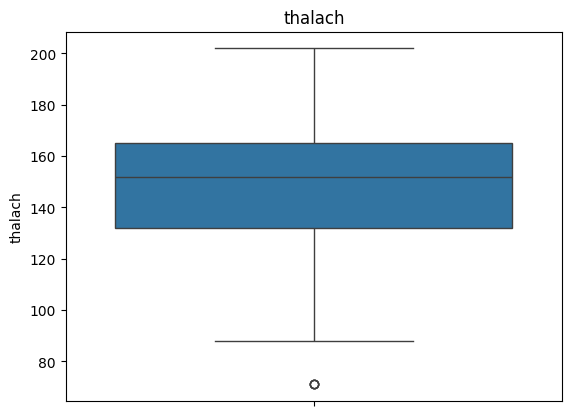

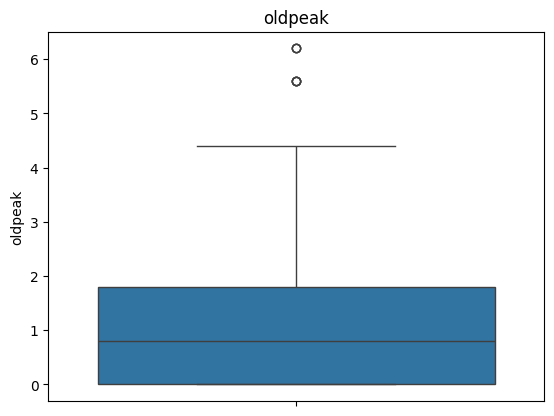

In [14]:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.boxplot(data[col])
    plt.title(f'{col}')
    plt.show()

w danych występują **wartości odstające**, **ale nie zostaną one usunięte**, bo są realnymi i prawdopodobnymi wartościami, które mogły wystąpić u pacjentów. usunięcie ich mogłoby pozbawić dane wartościowych i nietypowych informacji oraz zmniejszyć zdolność modelu do generalizacji.

w danych mamy trzy grupy zmiennych:
*   zmienne **ciągłe** (**numeryczne**):
    * *age*
    * *chol*
    * *trestbps*
    * *thalach*
    * *oldpeak*
*   zmienne **binarne**:
    * *sex*
    * *fbs*
    * *exang*
    * *target* (**zmienna docelowa**)
*   zmienne **kategoryczne**:
    * *cp*
    * *restecg*
    * *slope*
    * *ca*
    * *thal*

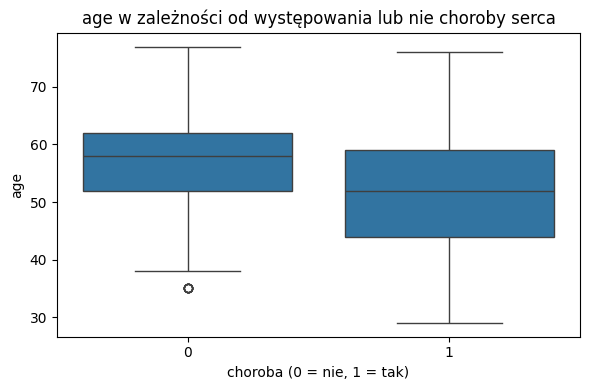

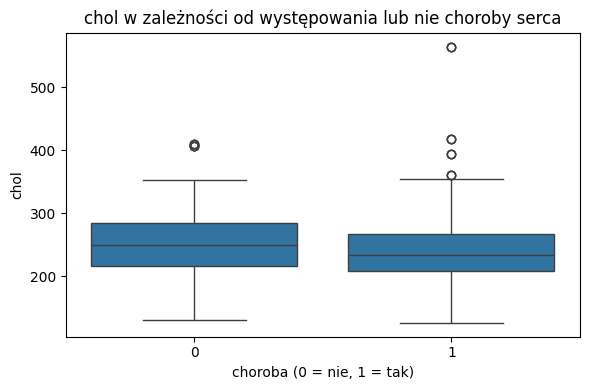

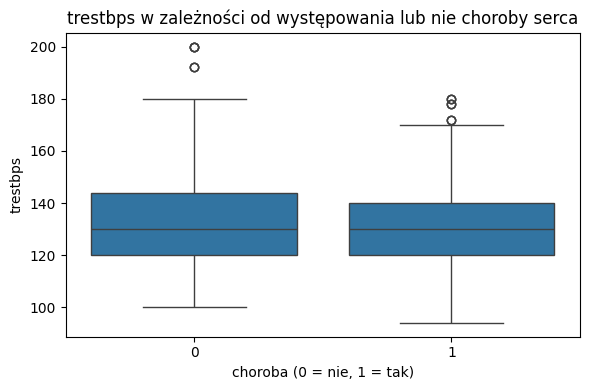

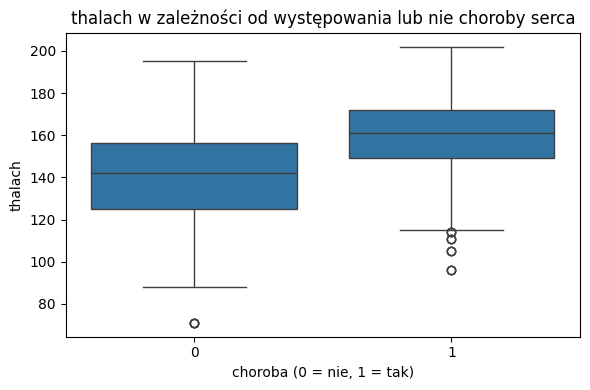

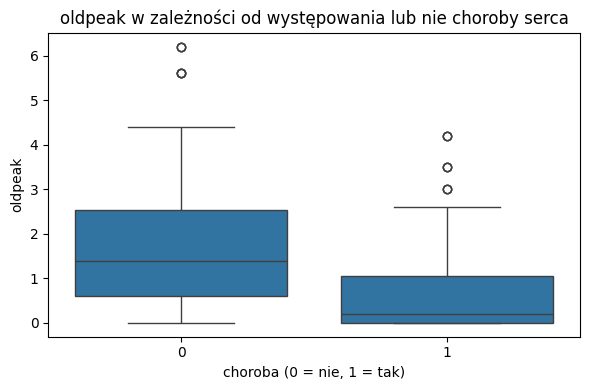

In [15]:
columns = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=data)
    plt.title(f'{col} w zależności od występowania lub nie choroby serca')
    plt.xlabel('choroba (0 = nie, 1 = tak)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

na podstawie **boxplotów** można stwierdzi, że:
* rozkład wieku pacjentów z chorobą serca jest szersza niż w grupie osób zdrowych, co sugeruje, że problem nie dotyczy wyłącznie osób starszych, ale również osób po 30 roku życia.
* w tych danych, pomimo, że wysoki poziom cholesterolu jest czynnikiem ryzyka chorób serca, to w grupie chorych średni poziom jest niższy niż w grupie zdrowych.
* w tych danych, osoby z chorobą serca mają minimalnie niższe średnie ciśnienie tętnicze niż osoby zdrowe
* w tych danych, pacjenci z chorobą serca osiągali wyższe maksymalne tętno niż zdrowi
* wartości oldpeak (obniżenie odcinka st) są wyraźnie niższe u osób z chorobą serca, co wskazuje na nietypowy charakter próbki.

podsumowując, **te dane nie zgadzają się z intuicją**.

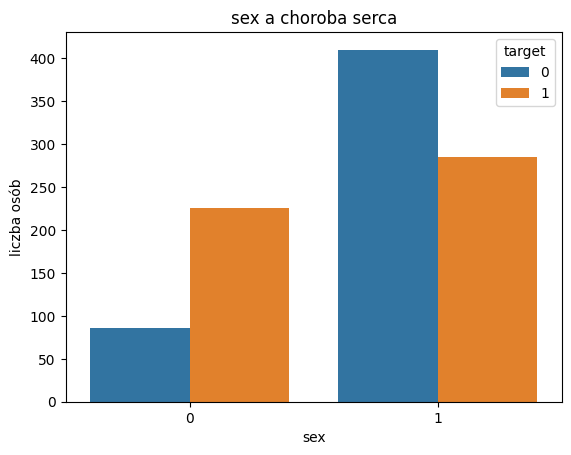

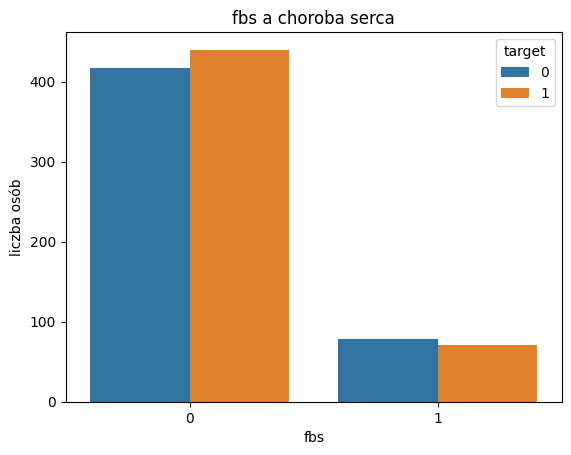

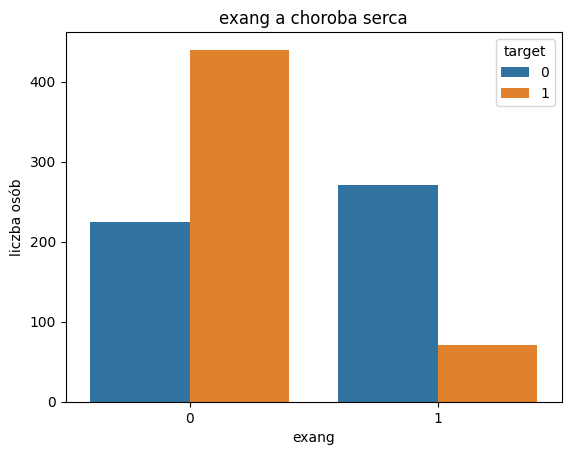

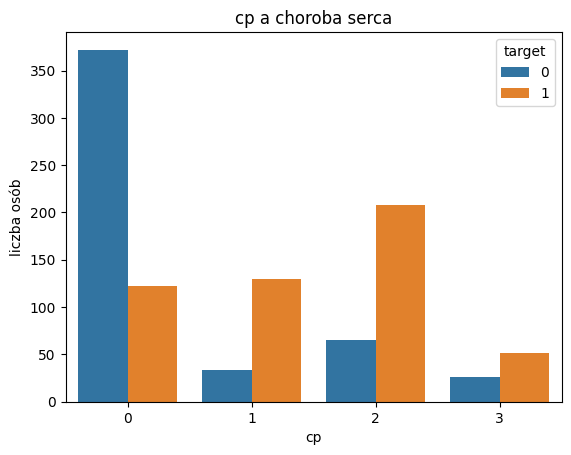

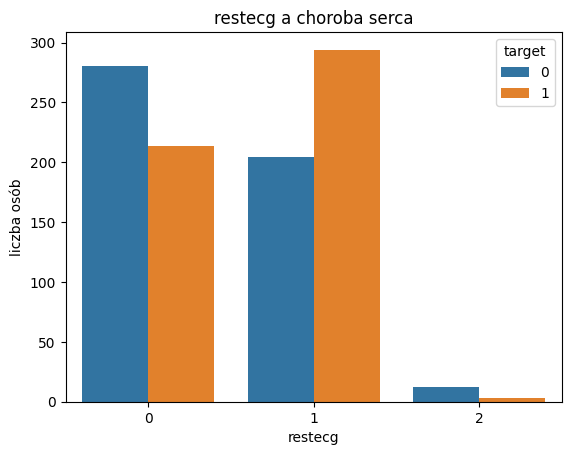

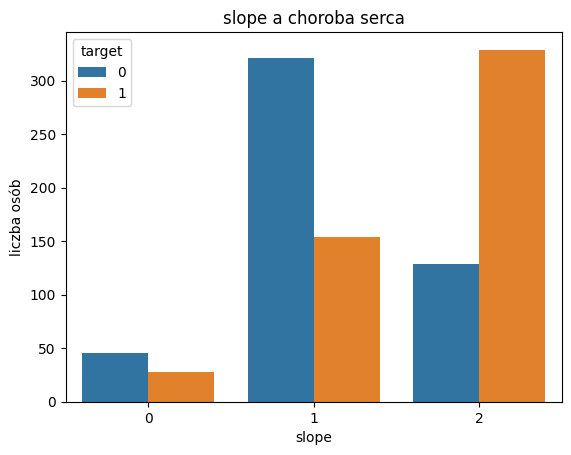

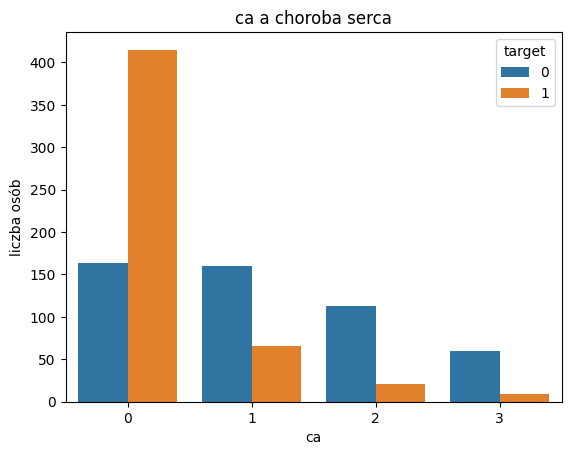

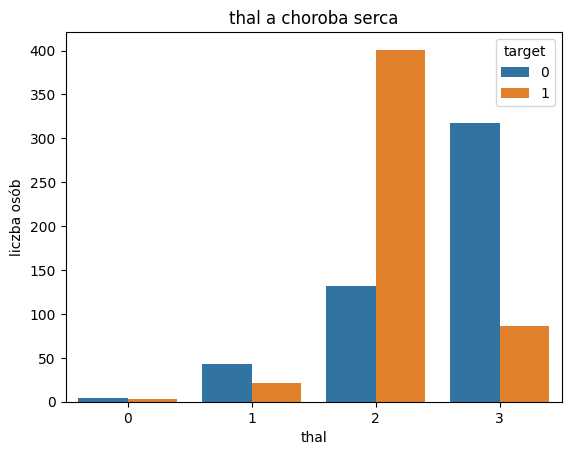

In [16]:
columns = ['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']

for col in columns:
    sns.countplot(x=col, hue='target', data=data)
    plt.title(f"{col} a choroba serca")
    plt.xlabel(f"{col}")
    plt.ylabel("liczba osób")
    plt.show()

na podstawie **countplotów** można stwierdzić, że
* **płeć** (*sex*): w próbie dominują mężczyźni, z czego większość z nich nie ma choroby serca. u kobiet jest odwrotnie - więcej chorobę ma niż nie.
* **poziom cukru na czczo** (*fbs*): nie widać silnej różnicy między grupami - niskie i wysokie poziomy cukru występują w obu przypadkach
* **dławica wysiłkowa** (*exang*): chorzy częściej jej nie mają niż zdrowi
* **ból w klatce piersiowej** (*cp*): pacjenci z chorobą częściej zgłaszają ból typu 2, natomiast osoby bez choroby brak tego bólu
* **nachylenie odcinka st** (*slope*): w przypadku braku choroby jest najczęściej płaskie (typ 1), a w przypadku jej wystąpienia podwyższone (typ 2)
* **liczba głównych naczyń wieńcowych** (*ca*): u chorych przeważa brak zmian widocznych we fluoroskopii
* **badanie talowe** (*thal*): u chorych dominuje typ 2, czyli odwracalny defekt

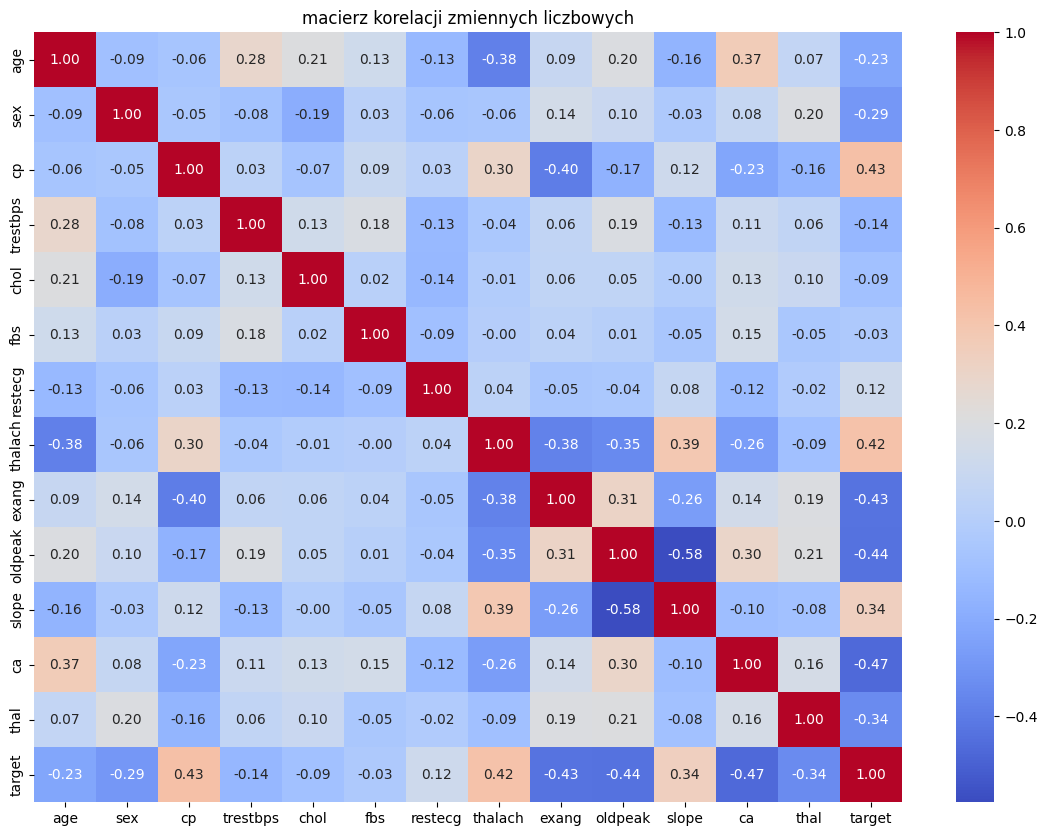

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('macierz korelacji zmiennych liczbowych')
plt.show()

analiza macierzy korelacji pozwoliła na zidentyfikowanie zależności między zmienny liczbowymi i dowiedzenie się, które cechy zwiększają szansę pacjenta na chorobę serca.

najsilniejsze korelacje ze zmienną docelową zaobserwowano dla:
*   *thalach* (maksymalne osiągnięte tętno) - dodatnia korelacja (**0.42**) - wyższe tętno częściej występuje u osób z chorobą serca
*   *oldpeak* (obniżenie odcinka st w badaniu ekg podczas testu wysiłkowego) - ujemna korelacja (**-0.44**) - większe obniżenie odcinka st występuje u pacjentów z chorobą serca
*   *exang* (bół dławicowy) - ujemna korelacja (**-0.44**) - brak bólu dławicowego łączy się z podatnością na chorobę serca
*   *cp* (typ bólu w klatce piersiowej) - dodatnie korelacja (**0.43**) - choroba serca częściej występuje u osób z charakterystycznym typem bólu



na etapie eksploracyjnej analizy przejrzano dane oraz przeanalizowano rozkłady zmiennych, boxploty i countploty oraz histogramy.

ustalono, że:
* dane nie zawierają braków
* dane są dobrze zbalansowane - target (choroba serca) rozkłada się niemal równo
* niektóre zmienne zawierają wartości odstające, ale są one prawdopodobne i rzeczywiste, więc nie zostały usunięte
* zmienna *ca* zawiera wartość marginalną (4), która została usunięta
* zmienna *thal* zawiera rzadką wartość (3), ale zostanie pozostawiona ze względu na jej liczebność.
* boxploty i histogramy wykazały kilka nieintuicyjnych zależności (np. wyższy cholesterol u zdrowych pacjentów), co sugeruje możliwy nietypowy charakter próby
* rozpoznano typy zmiennych: ciągłe (age, chol, trestbps, thalach, oldpeak), binarne (sex, fbs, exang) oraz kategoryczne (cp, restecg, slope, ca, thal), co umożliwia dalszy preprocessing

kolejnym etapem projektu jest **preprocessing**, czyli przygotowanie danych pod model uczenia maszynowego.

In [18]:
x = data.drop('target', axis=1)
y = data['target']

podział danych na **cechy** (**x**), na podstawie których model uczy się przewidywać oraz **zmienną docelową** (**y**)

In [19]:
x_treningowy_full, x_testowy, y_treningowy_full, y_testowy = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

x_treningowy, x_walidacyjny, y_treningowy, y_walidacyjny = train_test_split(x_treningowy_full, y_treningowy_full, test_size=0.1, stratify=y_treningowy_full, random_state=42)

In [20]:
print(len(x_treningowy))
print(len(x_walidacyjny))
print(len(x_testowy))

724
81
202


**podział danych do budowania modelu** na:
* zbiór **treningowy** (liczący 724 przypadów) - na tych danych model uczy się zależności
* zbiór **walidacyjny** (81) - dzięki niemu możliwe jest sprawdzenie, czy nie ma overfittingu oraz sprawdzenie hiperparametrów
* zbiór **testowy** (202) - końcowa ocena jakości modelu



In [21]:
ciągłe = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
binarne = ['sex', 'fbs', 'exang']
kategoryczne = ['cp', 'restecg', 'slope', 'ca', 'thal']

podział danych **według kategorii zmiennej**

In [22]:
scaler = StandardScaler()

x_treningowy[ciągłe] = scaler.fit_transform(x_treningowy[ciągłe])

In [23]:
x_walidacyjny[ciągłe] = scaler.transform(x_walidacyjny[ciągłe])
x_testowy[ciągłe] = scaler.transform(x_testowy[ciągłe])

**ustandaryzowanie zmiennych ciągłych**, żeby wszystkie cechy miały tę samą skalę i żeby uniknąć faworyzowania cech z dużą skalą

In [24]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [25]:
encoded_treningowy = encoder.fit_transform(x_treningowy[kategoryczne])
encoded_walidacyjny = encoder.transform(x_walidacyjny[kategoryczne])
encoded_testowy = encoder.transform(x_testowy[kategoryczne])

In [26]:
encoded_treningowy_data = pd.DataFrame(encoded_treningowy, columns=encoder.get_feature_names_out(kategoryczne), index=x_treningowy.index)
encoded_walidacyjny_data = pd.DataFrame(encoded_walidacyjny, columns=encoder.get_feature_names_out(kategoryczne), index=x_walidacyjny.index)
encoded_testowy_data = pd.DataFrame(encoded_testowy, columns=encoder.get_feature_names_out(kategoryczne), index=x_testowy.index)

In [27]:
x_treningowy = x_treningowy.drop(columns=kategoryczne)
x_walidacyjny = x_walidacyjny.drop(columns=kategoryczne)
x_testowy = x_testowy.drop(columns=kategoryczne)

In [28]:
x_treningowy = pd.concat([x_treningowy, encoded_treningowy_data], axis=1)
x_walidacyjny = pd.concat([x_walidacyjny, encoded_walidacyjny_data], axis=1)
x_testowy = pd.concat([x_testowy, encoded_testowy_data], axis=1)

In [29]:
print(data.isnull().any().any())

False


In [30]:
print(x_treningowy.shape)
print(x_walidacyjny.shape)
print(x_testowy.shape)
print(y_treningowy.shape)

(724, 26)
(81, 26)
(202, 26)
(724,)


**zakodowanie zmiennych kategorycznych za pomocą one-hot encoding**, co pozwala na przekształcenie ich w format numeryczny wymagany przez większość algorytmów uczenia maszynowego.

na etapie przygotowania danych do budowy modelu klasyfikacyjnego (**proprocessingu**) wykonano następujące kroki:
* podział danych na cechy (x) i zmienną docelową (y)
* podział danych na zbiór treningowy, walidacyjny i testowy
 * **80% danych** ---> **zbiór treningowy** (z czego zbiór ten podzielono na **właściwy zbiór treningowy** i **zbiór walidacyjny** w proporcji **90/10**)
 * **20% danych** ---> **zbiór testowy**
* podział danych według typów zmiennych:
 * **ciągłe**: *age*, *chol*, *trestbps*, *thalach*, *oldpeak*
 * **binarne**: *sex*, *fbs*, *exang*
 * **kategoryczne**: *cp*, *restecg*, *slope*, *ca*, *thal*
* standaryzacja zmiennych ciągłych
* one-hot encoding zmiennych kategorycznych



kolejnym etapem projektu jest **budowanie i porównywanie modeli predykcyjnych**:
*   **regresja logistyczna**
*   **drzewo decyzyjne**
*   **las losowy**



In [31]:
modele = {
    "logistic regression": LogisticRegression(max_iter=1000),
    "decision tree": DecisionTreeClassifier(),
    "random forest": RandomForestClassifier()
}

In [32]:
results = {}

In [33]:
for name, model in modele.items():
    model.fit(x_treningowy, y_treningowy)
    y_walidacyjny_predykcyjny = model.predict(x_walidacyjny)

    results[name] = {
        "accuracy": accuracy_score(y_walidacyjny, y_walidacyjny_predykcyjny),
        "precision": precision_score(y_walidacyjny, y_walidacyjny_predykcyjny),
        "recall": recall_score(y_walidacyjny, y_walidacyjny_predykcyjny),
        "f1 score": f1_score(y_walidacyjny, y_walidacyjny_predykcyjny),
    }

In [34]:
pd.DataFrame(results).T.sort_values(by="f1 score", ascending=False)

,accuracy,precision,recall,f1 score
random forest,1.000000,1.000000,1.00000,1.000000
decision tree,0.987654,1.000000,0.97561,0.987654
logistic regression,0.901235,0.851064,0.97561,0.909091


tabela wyników f1-score jasno wskazuje na **przeuczenie modelu** (**overfitting**) - widać to po wzorowych/idealnych wynikach

In [35]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(x_treningowy, y_treningowy)

y_testowy_predykcyjny = best_model.predict(x_testowy)

print("test accuracy:", accuracy_score(y_testowy, y_testowy_predykcyjny))
print("test precision:", precision_score(y_testowy, y_testowy_predykcyjny))
print("test recall:", recall_score(y_testowy, y_testowy_predykcyjny))
print("test F1 score:", f1_score(y_testowy, y_testowy_predykcyjny))

test accuracy: 0.9801980198019802
test precision: 0.9626168224299065
test recall: 1.0
test F1 score: 0.9809523809523809


przetestowanie modelu random forest (miał najlepszy wynik) na **zbiorze testowym** tylko potwierdza przeuczenie

przetestowanie pozostałych modeli oraz **ograniczonego** modelu random forest

In [36]:
logistic_regression = LogisticRegression(max_iter=1000)

decision_tree = DecisionTreeClassifier()

random_forest_limited = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

In [40]:
for name, model in {
    "logistic regression": logistic_regression,
    "decision tree": decision_tree,
    "random forest (limited)": random_forest_limited
}.items():
    model.fit(x_treningowy, y_treningowy)
    y_testowy_predykcyjny = model.predict(x_testowy)

    print(f"model: {name}")
    print("accuracy:", accuracy_score(y_testowy, y_testowy_predykcyjny))
    print("precision:", precision_score(y_testowy, y_testowy_predykcyjny))
    print("recall:", recall_score(y_testowy, y_testowy_predykcyjny))
    print("f1 score:", f1_score(y_testowy, y_testowy_predykcyjny))
    print("\n/-/-/-/-/-/-/-/-/-/-/-/\n")

model: logistic regression
accuracy: 0.8811881188118812
precision: 0.8434782608695652
recall: 0.941747572815534
f1 score: 0.8899082568807339

/-/-/-/-/-/-/-/-/-/-/-/

model: decision tree
accuracy: 0.9702970297029703
precision: 0.9619047619047619
recall: 0.9805825242718447
f1 score: 0.9711538461538461

/-/-/-/-/-/-/-/-/-/-/-/

model: random forest (limited)
accuracy: 0.9108910891089109
precision: 0.8899082568807339
recall: 0.941747572815534
f1 score: 0.9150943396226415

/-/-/-/-/-/-/-/-/-/-/-/



do wybrania odpowiedniego modelu decyzyjnego, nie na ślepo, posłużę się macierzami pomyłek. dzięki temu będę mogła porównać, który z modeli przewiduje najmniej **false negative**, czyli brak choroby, gdy pacjent ją ma

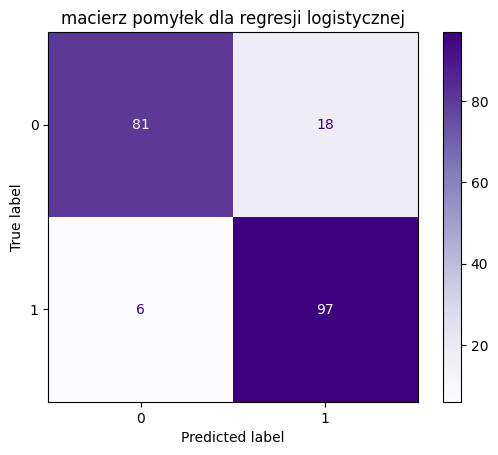

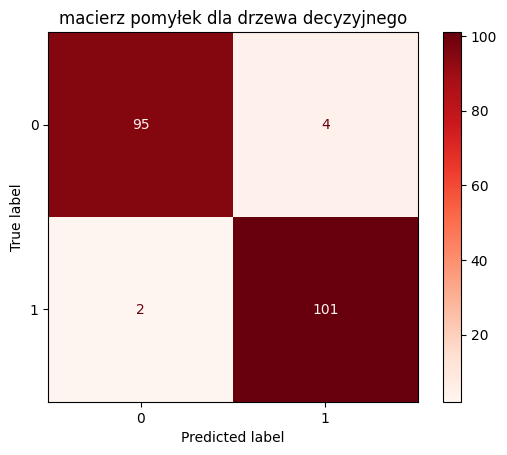

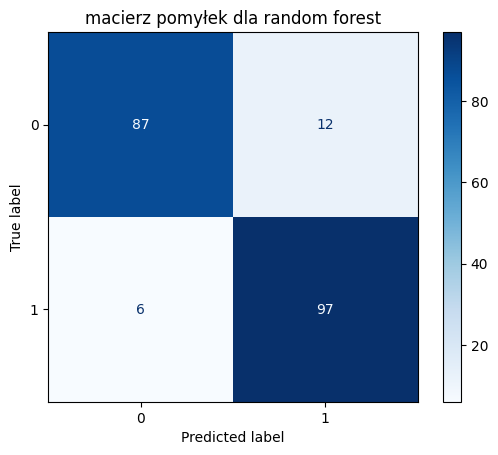

In [48]:
y_predykcyjny_logistic_regression = logistic_regression.predict(x_testowy)
y_predykcyjny_decision_tree = decision_tree.predict(x_testowy)
y_predykcyjny_random_forest = random_forest_limited.predict(x_testowy)

macierz_pomyłek_logistic_regression = confusion_matrix(y_testowy, y_predykcyjny_logistic_regression)
disp = ConfusionMatrixDisplay(confusion_matrix=macierz_pomyłek_logistic_regression)
disp.plot(cmap='Purples')
plt.title("macierz pomyłek dla regresji logistycznej")
plt.show()

macierz_pomyłek_decision_tree = confusion_matrix(y_testowy, y_predykcyjny_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=macierz_pomyłek_decision_tree)
disp.plot(cmap='Reds')
plt.title("macierz pomyłek dla drzewa decyzyjnego")
plt.show()

macierz_pomyłek_random_forest = confusion_matrix(y_testowy, y_predykcyjny_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=macierz_pomyłek_random_forest)
disp.plot(cmap='Blues')
plt.title("macierz pomyłek dla random forest")
plt.show()

w oparciu o analizę macierzy pomyłek i metryk jakości, jako model końcowy wybrano ograniczony **las losowy** (**random forest**), który przy umiarkowanym ryzyku błędów fałszywie dodatnich i umiarkowanej liczbie fałszywie ujemnych oferuje największą równowagę między skutecznością predykcji a odpornością na przeuczenie.

na etapie budowania i porównywania modeli predykcyjnych wykonano następujące kroki:
* przetestowano trzy modele: **regresję logistyczną**, **drzewo decyzyjne** oraz **las losowy**
* wszystkie modele oceniano na zbiorze walidacyjnym przy użyciu metryk: **accuracy**, **precision**, **recall**, **f1 score**
* las losowy osiągnął idealny wynik (f1 = 1.0), co wskazywało na **przeuczenie** - potwierdzone na zbiorze testowym
* **ograniczono** złożoność lasu losowego (n_estimators=100, max_depth=5, min_samples_split=10), co poprawiło generalizację modelu
* ograniczony laas losowy osiągnął najwyższy wynik f1 na zbiorze testowym (f1 = ok. 0.915)
* drzewo decyzyjne miało jeszcze wyższy f1 (0.97), ale jest znane z dużej podatności na przeuczenie i z braku stabilności
* regresja logistyczna była najprostsza i stabilna, ale miała najniższy wynik f1 (ok. 0.89)
* **analiza macierzy pomyłek** wykazała, że ograniczony las losowy nie popełniał błędów **false nagative** (co istotne w kontekście medycznym oraz zdrowia i życia pacjentów), a **false positive** były na akceptowalnym poziomie
* finalny wybór: ograniczony **las losowy** – najwyższa skuteczność + akceptowalna generalizacja

# podsumowanie całego projektu
* celem projektu było stworzenie modelu klasyfikacyjnego, który na podstawie informacji o pacjentach sklasyfikuje i **przewidzi, czy u danego pacjenta występuje choroba serca**
* proces obejmował: eksplorację, czyszczenie danych, preprocessing (standaryzację, kodowanie), budowę i ewaluację modeli
* porównano trzy modele pod kątem metryk i zachowania na zbiorach walidacyjnym i testowym
* szczególną wagę przyłożono do interpretacji wyników i minimalizacji błędów false negative (ważne w kontekście medycznym, gdzie na szali jest stan zdrowotny i życie człowieka).
* ostatecznie ograniczony **las losowy** zapewnił najlepszy kompromis między skutecznością a odpornością na przeuczenie
* projekt kończy się gotowym, przetestowanym i uzasadnionym modelem predykcyjnym, który może być dalej rozwijany lub wdrażany